# Lorenz 96 path space annealing

Carry out path space annealing for a Lorenz 96 model, in an arbitrary number of dimensions $D$.

In [1]:
import numpy as np
import pyanneal

In [4]:
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

Let's set the path to the twin experiment data

In [2]:
datapath = 'l96_twindata_D20_L14_dt0p02.npy'
data = np.load(datapath)

# observation times, number of time points, measured components
times = data[:,0]
#dt = times[1:] - times[:-1]
dt = times[1] - times[0]
N = len(times)
t0 = times[0]
tf = times[-1]

Now define the ODE vector field.

In [3]:
def l96(x, t, k):
    return np.roll(x,1,1) * (np.roll(x,-1,1) - np.roll(x,2,1)) - x + k

Define model and twin experiment parameters

In [4]:
D = 20
P = (8.17*np.ones(D),)
Pidx = ()

Lidx = (0, 1, 3, 4, 6, 7, 9, 10, 12, 13, 15, 16, 18, 19)
L = len(Lidx)

RM = np.eye(L)/(0.2**2)
RF0_val = .0001 * dt**2
RF0 = RF0_val * np.eye(D)

Initial path guess

In [6]:
Xinit = (20.0*np.random.rand(N*D) - 10.0)

Annealing parameters

In [7]:
alpha = 1.5
beta_array = np.linspace(0.0, 70.0, 71)

Initialize a twin experiment

In [8]:
twin1 = pyanneal.TwinExperiment(l96, Lidx, RM, RF0, data_file=datapath, P=P, Pidx=Pidx)

Carry out a single annealing run

In [ ]:
twin1.anneal(Xinit, alpha, beta_array, init_to_data=True, method='lbfgs_scipy', disc='impeuler')

In [40]:
data = np.load("l96_twindata.npy")

In [36]:
result = np.loadtxt("path/D5_M5_PATH0.dat")

<IPython.core.display.Javascript object>


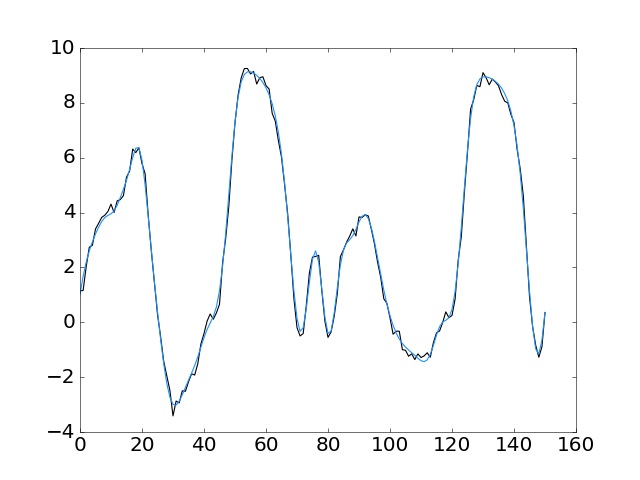

In [44]:
plt.plot(data[:, 4], color="black")
plt.plot(result[45, 6::5], color="dodgerblue")
plt.show()
plt.close()

<IPython.core.display.Javascript object>


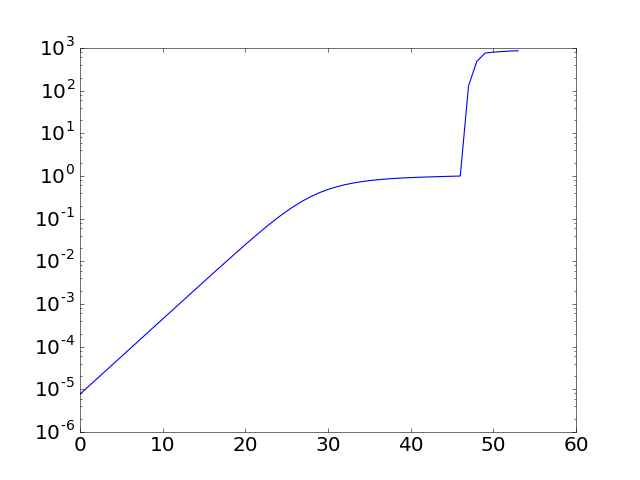

In [39]:
plt.semilogy(result[:, 2])
plt.show()